# Matplotlib bar chart storytelling

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import duckdb 
from constants import GRAY_1,GRAY_2,GRAY_3,BLUE_1

df = pd.read_csv('data/norway_by_make.csv')
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [29]:
df_quantity_brand = duckdb.query("""--sql
                                 Select
                                    make as brand,
                                    Sum(quantity) as Quantity,
                                    from df
                                    group by Brand
                                    order by quantity desc
                                 """).df().set_index('brand')

df_quantity_brand


,Quantity
brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
...,...
Tata,1.0
Infiniti,1.0
Martin Motors,1.0


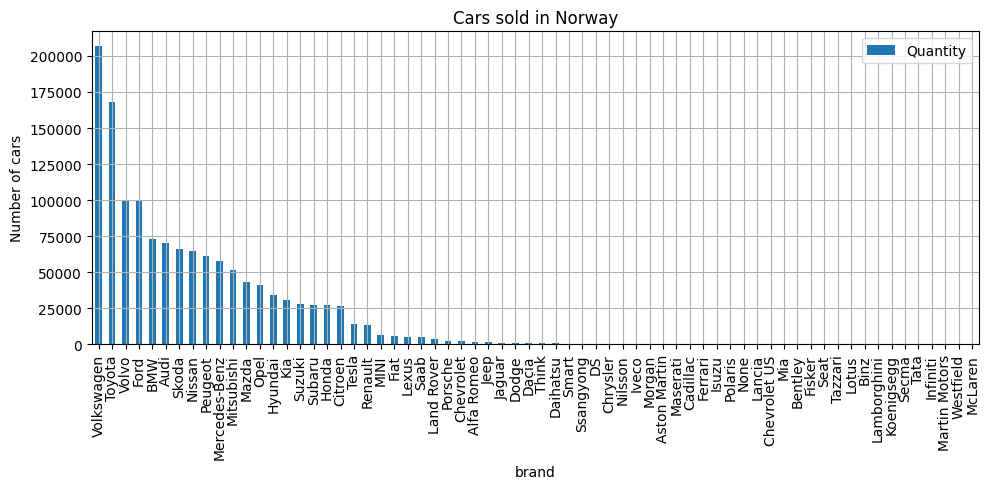

In [42]:
ax = df_quantity_brand.plot(kind='bar',title='Cars sold in Norway',ylabel='Number of cars',figsize=(10,5))
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figures/norway_by_make.png', dpi=300)

In [45]:
df_quantity_brand.iloc[:10]

,Quantity
brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


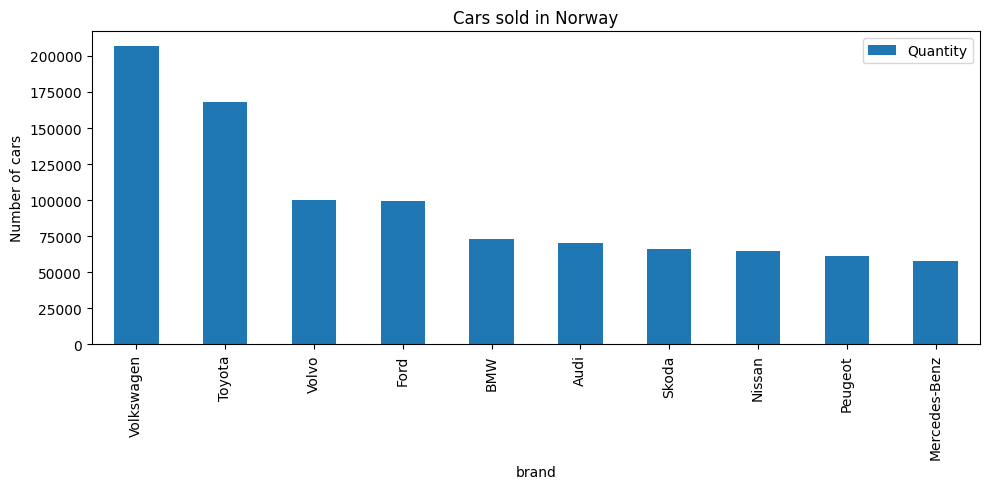

In [46]:
ax = df_quantity_brand.iloc[:10].plot(
    kind='bar',title='Cars sold in Norway',ylabel='Number of cars',figsize=(10,5))

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figures/norway_by_make.png', dpi=300)